In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
uploaded = files.upload()

df = pd.read_csv('depression_data.csv')


Saving depression_data.csv to depression_data (2).csv


Original number of rows : 413768

---Working on Age---
Found 0 outliers in Age


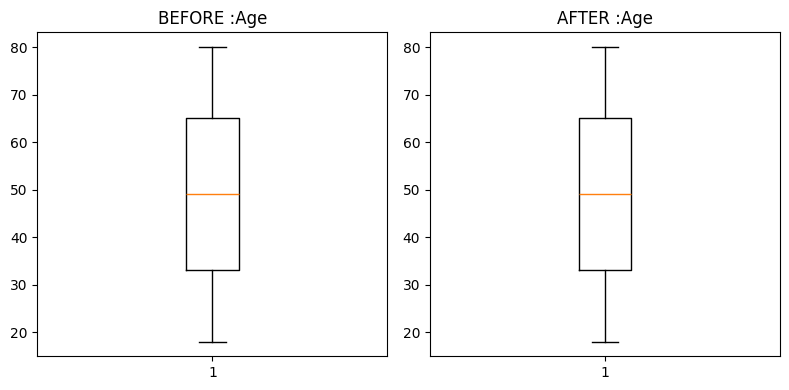

Rows remaining after removing Age outliers : 413768

---Working on Number of Children---
Found 0 outliers in Number of Children


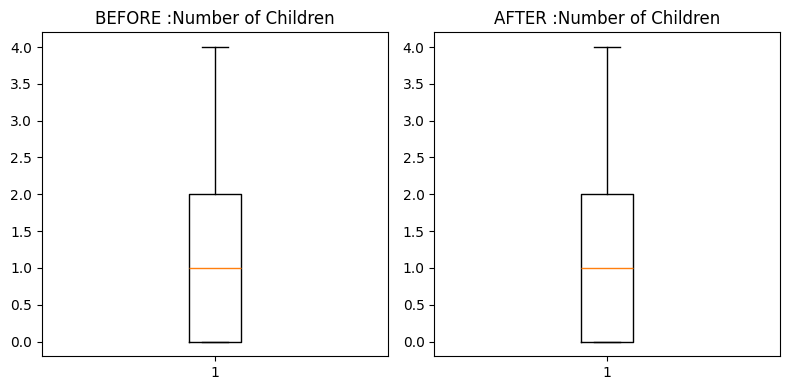

Rows remaining after removing Number of Children outliers : 413768

---Working on Income---
Found 5157 outliers in Income


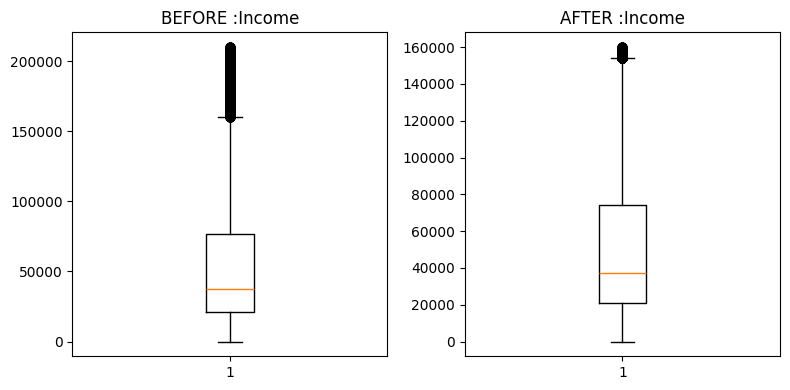

Rows remaining after removing Income outliers : 408611
Saved clean data to : depression_data_clean.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
original_data = df.copy()
print("Original number of rows :" , len(df))

#Numeric columns
numeric_cols = ['Age','Number of Children','Income']

for col in numeric_cols:
  print(f"\n---Working on {col}---")

  #Visulization
  plt.figure(figsize=(8,4))
  plt.subplot(1,2,1),plt.boxplot(df[col]),plt.title(f"BEFORE :{col}")

  #Finding outliers
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1

  #Finding boundries
  lower_limit = Q1 - 1.5 * IQR
  upper_limit = Q3 + 1.5 * IQR

  outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]
  print(f"Found {len(outliers)} outliers in {col}")

  #Removing outliers
  df = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]

  #visualization
  plt.subplot(1,2,2)
  plt.boxplot(df[col])
  plt.title(f"AFTER :{col}")

  plt.tight_layout()
  plt.show()

  print(f"Rows remaining after removing {col} outliers : {len(df)}")

df.to_csv('depression_data_clean.csv', index=False)
print("Saved clean data to : depression_data_clean.csv")

files.download('depression_data_clean.csv')